In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
sample_data = pd.read_csv("resources/train.csv")
project_data = pd.read_csv("resources/test.csv")

In [3]:
sample_data.isnull().sum()
print("Sample Data Shape:" , sample_data.shape)
project_data.isnull().sum()
print("Project Data Shape:", project_data.shape)

Sample Data Shape: (891, 12)
Project Data Shape: (418, 11)


In [4]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Data Breakdown Of What We Are Looking For
- Survived 0 = NO, 1 = YES
- pclass: Passenger's class, 1 = 1st, 2 = 2nd, 3=3rd
- sibsp: # of siblings or spouse *doesn't include mistresses or fiances*
- parch: # of parents and children in family *doesn't include travel companion ie nanny*
- embarked: location that passengers boarded ship C = Cherbourg, Q = Queenstown, S = Southampton
- dropping TICKET, FARE, CABIN, DROP INDEX

In [6]:
sample_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
project_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
sample_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
project_data.isnull().sum()
project_data["Survived"] = ""
project_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


In [12]:
#set up the bar chart
def bar_chart(feature):
    survived = sample_data[sample_data['Survived']==1][feature].value_counts()
    dead = sample_data[sample_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived","Dead"]
    df.plot(kind = 'bar', stacked=True, figsize=(10,5))

Passengers Who Survived :
 female    233
male      109
Name: Sex, dtype: int64
Passengers Who Passed Away:
 male      468
female     81
Name: Sex, dtype: int64


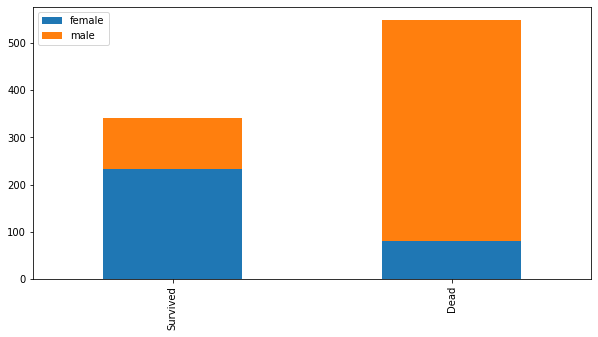

In [17]:
bar_chart('Sex')
print("Passengers Who Survived :\n",sample_data[sample_data['Survived']==1]['Sex'].value_counts())
print("Passengers Who Passed Away:\n",sample_data[sample_data['Survived']==0]['Sex'].value_counts())

Passengers Who Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Passengers Who Passed Away:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


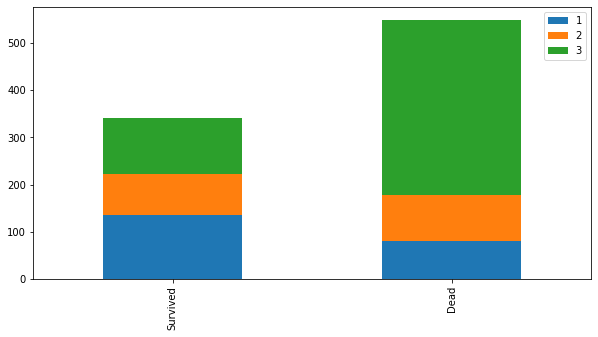

In [18]:
bar_chart('Pclass')
print("Passengers Who Survived :\n",sample_data[sample_data['Survived']==1]['Pclass'].value_counts())
print("Passengers Who Passed Away:\n",sample_data[sample_data['Survived']==0]['Pclass'].value_counts())

### Bar charts confirms that:
    1st Class is more likely to survive than other classes
    3rd Class had a higher mortality rate than any other class